In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# Read CSV file
df = pd.read_csv('heart.csv')

# Display the first 5 rows
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [47]:
df.shape

(303, 14)

In [48]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [49]:
#checking for null values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

In [53]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(242, 13)

In [55]:
X_test.shape

(61, 13)

In [56]:
y_train.shape

(242,)

In [57]:
y_test.shape

(61,)

In [58]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
#Train models
#Logistic Regression

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)


In [60]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)


In [61]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [63]:
# Accuracies
acc_log = accuracy_score(y_test, log_pred)
acc_tree = accuracy_score(y_test, tree_pred)
acc_rf = accuracy_score(y_test, rf_pred)

# Print accuracy scores
print(f"Logistic Regression Accuracy: {acc_log:.2f}")
print(f"Decision Tree Accuracy: {acc_tree:.2f}")
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# Confusion Matrices
print("Logistic Regression CM:\n", confusion_matrix(y_test, log_pred))
print("Decision Tree CM:\n", confusion_matrix(y_test, tree_pred))
print("Random Forest CM:\n", confusion_matrix(y_test, rf_pred))



Logistic Regression Accuracy: 0.85
Decision Tree Accuracy: 0.75
Random Forest Accuracy: 0.84
Logistic Regression CM:
 [[25  4]
 [ 5 27]]
Decision Tree CM:
 [[25  4]
 [11 21]]
Random Forest CM:
 [[24  5]
 [ 5 27]]


C:\Users\HP\AppData\Local\Temp\ipykernel_11272\899652250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


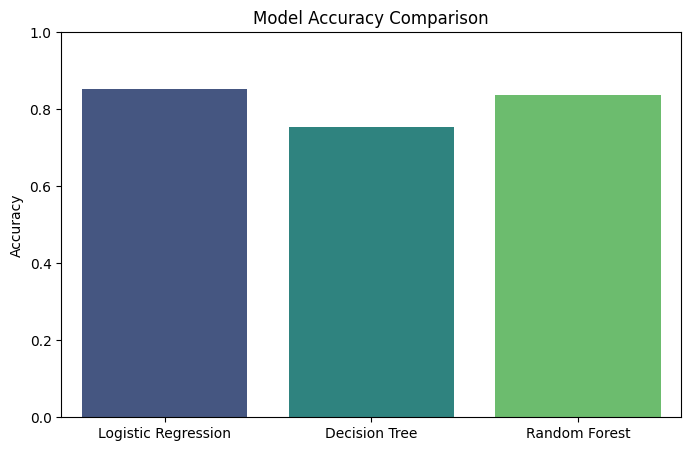

In [64]:
#Bargraph
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [acc_log, acc_tree, acc_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


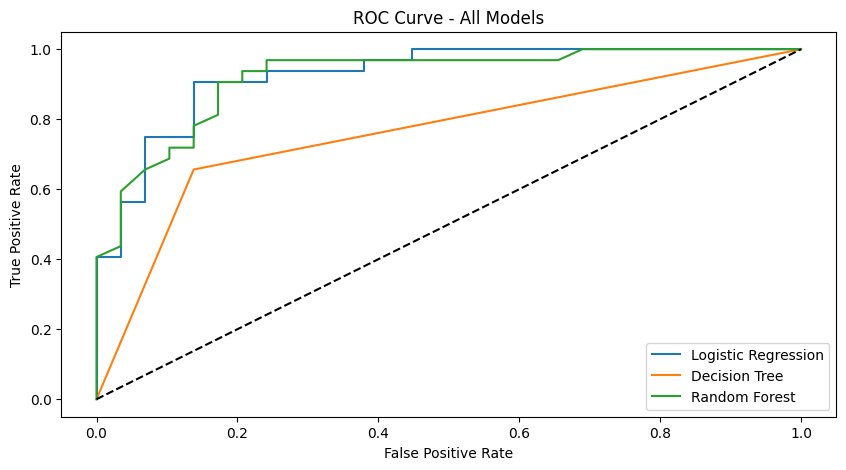

In [66]:
#ROC Curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(10, 5))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - All Models")
plt.legend()
plt.show()

In [ ]:
#RandomForest is the best model for prediction.